In [ ]:
import random as rndd
import math 
import time
import numpy as np
import time


In [1]:
def fitnessvo(x):
  N = 35;
  A = 50.6;
  l = 178e-4;
  Jmax = 1.5;
  Tfc = 343;
  PH2 = 1;
  PO2 = 1;
  Vm = [33.25, 30.80, 29.75, 28.70, 28.00, 26.60, 26.25, 25.20, 24.50, 23.80, 22.05, 21.00, 19.60];
  Ifc= [5.060, 10.626, 16.192, 20.240, 27.830, 34.408, 37.444, 43.010, 48.070, 56.166, 61.226, 67.298, 71.852];
  SSD = 0
  Vact = np.zeros(len(Ifc),dtype=float)
  Rom = np.zeros(len(Ifc),dtype=float)
  Rm = np.zeros(len(Ifc),dtype=float)
  Vohmic = np.zeros(len(Ifc),dtype=float)
  Vstack = np.zeros(len(Ifc),dtype=float)
  SE = np.zeros(len(Ifc),dtype=float)
  for i in range (len(Ifc)):
      En=1.229-((0.85e-3)*(Tfc-298.15))+ ((4.31*10**-5)*Tfc*(math.log(PH2)+0.5*math.log(PO2)));
      CO2=PO2/(5.08*10**6*math.exp(-498/Tfc))
      Vact[i]= -(x[0]+x[1]*Tfc+x[2]*Tfc*math.log(CO2)+x[3]*Tfc*math.log(Ifc[i]))
      Rom[i]=181.6*(1+0.03*(Ifc[i]/A)+0.062*(Tfc/303)**2*(Ifc[i]/A)**2.5)/((x[4]-0.634-3*(Ifc[i]/A))*math.exp(4.18*(Tfc-303)/Tfc))
      Rm[i]=Rom[i]*l/A
      Vcon= -(x[5]*math.log(1-((Ifc[i]/A)/Jmax)))
      Vohmic[i]=Ifc[i]*(Rm[i]+x[6])
      Vstack[i]= N*(En-Vact[i]-Vohmic[i]-Vcon)
      SE[i]= (Vstack[i]-Vm[i])**2
      SSD =  SSD+SE[i]
  fitnessval = SSD
  return fitnessval

BES

In [21]:
from mealpy import FloatVar
from mealpy.swarm_based.BES import OriginalBES
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.math_based.SCA import OriginalSCA
from mealpy.math_based.AOA import OriginalAOA


print('Iteration===============>',iter)
problem_dict = {
    "obj_func": fitnessvo,
    "bounds": FloatVar(lb=[-1.19969, 0.001, 3.6e-5, -2.6e-4, 13, 0.0136, 1e-4], ub=[-0.8532, 0.005, 9.8e-5, -9.54e-5, 23, 0.5, 8e-4]),
    "minmax": "min",
    }

epoch = 100
pop_size = 12

# BES 
a_factor = 10
R_factor = 1.5
alpha = 2.0
c1 = 2.0
c2 = 2.0
model_BES = OriginalBES(epoch, pop_size, a_factor, R_factor, alpha, c1, c2)
model_BES.solve(problem_dict)

# GA
model_GA = BaseGA(epoch = epoch, pop_size=pop_size)
model_GA.solve(problem_dict)

# SCA
model_SCA = OriginalSCA(epoch=epoch, pop_size=pop_size)
model_SCA.solve(problem_dict)

#AOA
model_AOA = OriginalAOA(epoch = epoch, pop_size=pop_size)
model_AOA.solve(problem_dict)
 

2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: Solving single objective optimization problem.
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 1, Current best: 73.11060449818189, Global best: 73.11060449818189, Runtime: 0.01337 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 2, Current best: 54.023139328593345, Global best: 54.023139328593345, Runtime: 0.01214 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 3, Current best: 29.16233115841073, Global best: 29.16233115841073, Runtime: 0.01168 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 4, Current best: 23.70914707955492, Global best: 23.70914707955492, Runtime: 0.01179 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 5, Current best: 20.479338508498437, Global best: 20.479338508498437, Run

Iteration===============> <built-in function iter>


2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 14, Current best: 10.006510981095659, Global best: 10.006510981095659, Runtime: 0.01107 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 15, Current best: 9.94670633710117, Global best: 9.94670633710117, Runtime: 0.01163 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 16, Current best: 9.535291371347455, Global best: 9.535291371347455, Runtime: 0.01472 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 17, Current best: 9.135102009800496, Global best: 9.135102009800496, Runtime: 0.01254 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 18, Current best: 9.029540311706882, Global best: 9.029540311706882, Runtime: 0.01311 seconds
2024/03/02 05:07:05 PM, INFO, mealpy.swarm_based.BES.OriginalBES: >>>Problem: P, Epoch: 19

id: 30551, target: Objectives: [1.79550923], Fitness: 1.7955092293779658, solution: [-8.53200000e-01  2.42723609e-03  3.61334672e-05 -1.14778115e-04
  2.30000000e+01  2.34286147e-02  1.37656663e-04]

In [22]:
print(f"Fitness AOA: {model_AOA.g_best.target.fitness}")
print(f"Fitness GA: {model_GA.g_best.target.fitness}")
print(f"Fitness SCA: {model_SCA.g_best.target.fitness}")
print(f"Fitness BES: {model_BES.g_best.target.fitness}")

Fitness AOA: 1.7955092293779658
Fitness GA: 30.348795319546543
Fitness SCA: 3.672763131286467
Fitness BES: 8.456292661370146


# SSO

In [27]:
def simulate_1d_bm(nsteps=10, t=0.001):  # Adjusted the value of t for smaller steps
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x



def Optimizer_SSO(Max_iter = 500, SearchAgents_no = 15, dim = 3, lb = 0, ub= 100, objf = 'Discuss',
                             Elite_agents = 7, Inferior_agents = 8):


    # initialize of Elite, Inferior
    Global_pos = np.zeros((1,dim))
    Global_score = np.ones(1)

    Elite_pos = np.zeros((Elite_agents ,dim))
    Elite_score = np.ones((Elite_agents ))

    Inferior_pos = np.zeros((Inferior_agents,dim))
    Inferior_score = np.ones((Inferior_agents))

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    Sorted_Positions = np.zeros((SearchAgents_no, dim))
    Convergence_curve = np.zeros(Max_iter)
    Fitness = np.ones((SearchAgents_no))*np.inf
    Sorted_Fitness = np.ones((SearchAgents_no))


    # initalization of search agents

    for i in range(0, SearchAgents_no):
        for j in range(dim):
            Positions[i, j] =(ub[j]-lb[j]) * rndd.random() + lb[j]

        # Calculate objective function for each search agent
        Fitness[i] = eval(objf)(Positions[i, :])


    #Sorting
    Sorted_Positions = sorted(Positions, key = eval(objf))
    Sorted_Fitness = sorted(Fitness)

    # Grouping
    Global_score = Sorted_Fitness[0]
    Global_pos = Sorted_Positions[0].copy()

    for i in range(0, Elite_agents):
        Elite_score[i] = Sorted_Fitness[i]
        Elite_pos[i] = Sorted_Positions[i].copy()


    for i in range(0, Inferior_agents):
        Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
        Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

    for it in range (0, Max_iter):

        # Population Update
        a = 0.02*(1 - it/Max_iter)
        #Elite
        for i in range(0, Elite_agents):
            u = []
            c1 = 1
            c2 = 1
            w=1 
            for j in range(dim):
                ra = rndd.random()
                rb = rndd.random()
                values = simulate_1d_bm()
                intt = rndd.randint(0,9)
                ui = Elite_pos[i,j]*values[intt]

                Elite_pos[i,j] =  w*Elite_pos[i,j] + (c1*ra*(- Elite_pos[i,j] + ui)) + c2*rb*(Global_pos[j] - Elite_pos[i][j])

            Elite_score[i] = eval(objf)(Elite_pos[i, :])

            #Inferior
        for i in range(0, Inferior_agents):
            # Inferior position update

            for j in range(dim):
    
                 Inferior_pos[i,j] = ((rndd.random()* (ub[j] - lb[j])) + lb[j] )

            Inferior_score[i] = eval(objf)(Inferior_pos[i, :])


        #Sorting
        Fitness =  np.concatenate((Elite_score, Inferior_score), axis = 0)
        Positions  =  np.concatenate((Elite_pos, Inferior_pos), axis = 0)

        Sorted_Positions = sorted(Positions, key = eval(objf))
        Sorted_Fitness = sorted(Fitness)

        if Sorted_Fitness[0] < Global_score :
            Global_score = Sorted_Fitness[0]
            Global_pos = Sorted_Positions[0].copy()
            #print("Global_Score", Global_score)

        for i in range(0, len(Elite_score)):
            Elite_score[i] = Sorted_Fitness[i]
            Elite_pos[i] = Sorted_Positions[i].copy()


        for i in range(0, len(Inferior_score)):
            Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
            Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

        Convergence_curve[it] = Global_score


    return Global_score, Convergence_curve

In [28]:
timerStart = time.time()
lb=[-1.19969, 0.001, 3.6e-5, -2.6e-4, 13, 0.0136, 1e-4]
ub=[-0.8532, 0.005, 9.8e-5, -9.54e-5, 23, 0.5, 8e-4]
SearchAgents_no = 15
Elite_agents = 7
Inferior_agents = SearchAgents_no - Elite_agents
Max_iter = 100
runs = 1
dim = len(lb)
objf = 'fitnessvo'
Global_score, Conv_cirve = Optimizer_SSO(Max_iter, SearchAgents_no, dim, lb, ub, objf,  Elite_agents, Inferior_agents)

In [29]:
print(Global_score)


15.667531513518185


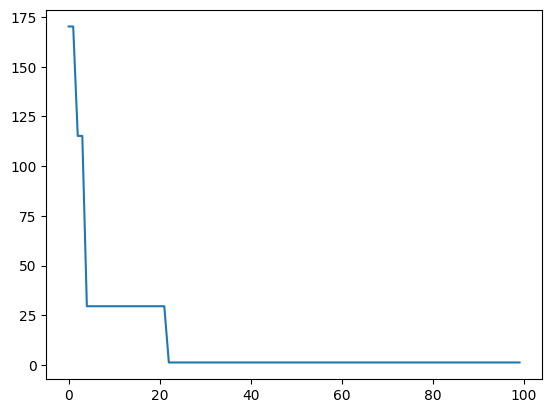

In [26]:
import matplotlib.pyplot as plt

plt.plot(Conv_cirve)

plt.show()